In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import time

import optimization
import oracles

from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

import oracles
import numpy as np
import random
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, diags
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from inspect import getfullargspec
from itertools import product
from optimization import *
from plot_trajectory_2d import plot_levels, plot_trajectory
import matplotlib.pyplot as plt

In [ ]:
from libsvm.svmutil import *

In [ ]:
def compare_speed(svm_file, method):
    A, b = load_svmlight_file(svm_file)
    A, _, b, _ = train_test_split(A, b, test_size=0.1)
    regcoef = 1.0 / len(b)
    oracle = oracles.create_log_reg_oracle(A, b, regcoef)
    _, _, history_gd = optimization.gradient_descent(oracle,
                                                     np.zeros(A.shape[1]),
                                                     trace=True,
                                                     line_search_options=LineSearchTool(method))
    

    plt.xlabel('t, sec')
    plt.ylabel('f(x)')

    plt.plot(history_gd['time'],
             history_gd['func'],
             label="Gradient Descent with " + method)

    _, _, history_nt = optimization.newton(oracle,
                                          np.zeros(A.shape[1]),
                                          display=True,
                                          trace=True,
                                          line_search_options=LineSearchTool(method))
    plt.plot(history_nt['time'],
             history_nt['func'],
             label="Newton with " + method)

    plt.legend()
    plt.show()
    print(len(history_gd['time']))
    print(len(history_nt['time']))

    grad = oracle.grad(np.zeros(A.shape[1]))
    grad_0_norm = 1.0 / grad.dot(grad)

    plt.plot(history_gd['time'],
             np.square(np.array(history_gd['grad_norm'])) * grad_0_norm,
             label="Gradient Descent with " + method)
    plt.plot(history_nt['time'],
             np.square(np.array(history_nt['grad_norm'])) * grad_0_norm,
             label="Newton with " + method)
    plt.yscale('log')
    plt.xlabel('t, sec')
    plt.ylabel('norm_grad/norm_grad_0')
    plt.legend()
    plt.show()

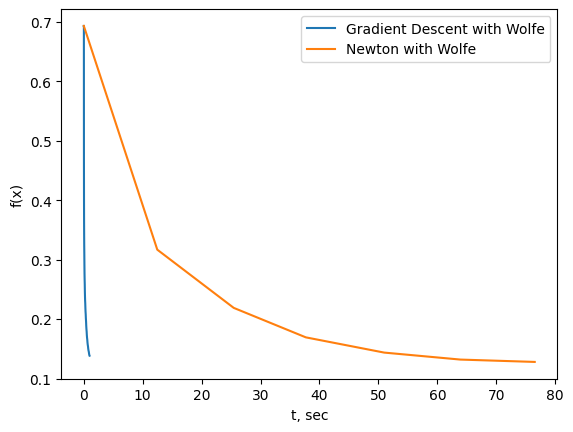

36
7


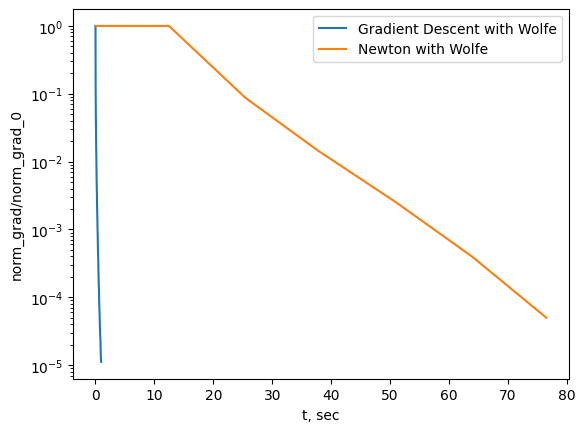

In [4]:
compare_speed('w8a', method='Wolfe')

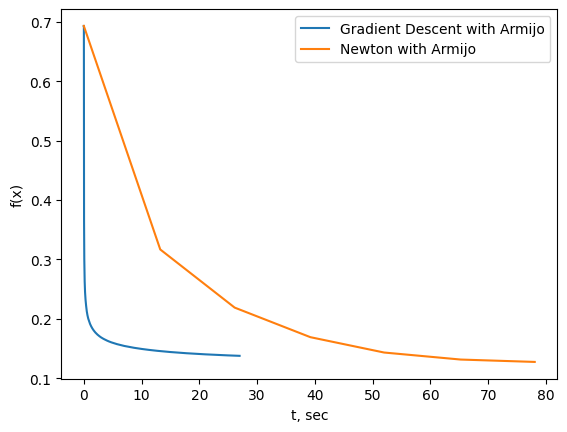

3006
7


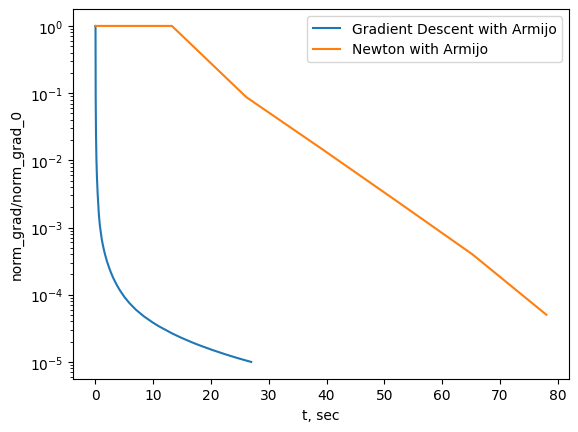

In [5]:
compare_speed('w8a', method='Armijo')

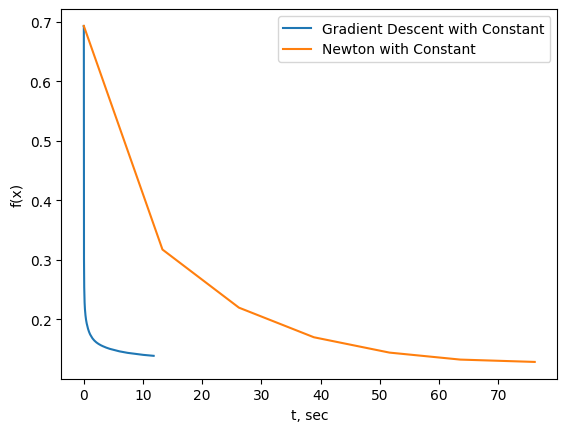

3026
7


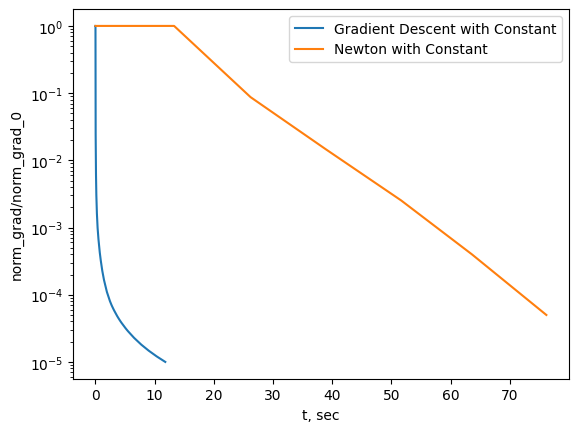

In [6]:
compare_speed('w8a', method='Constant')

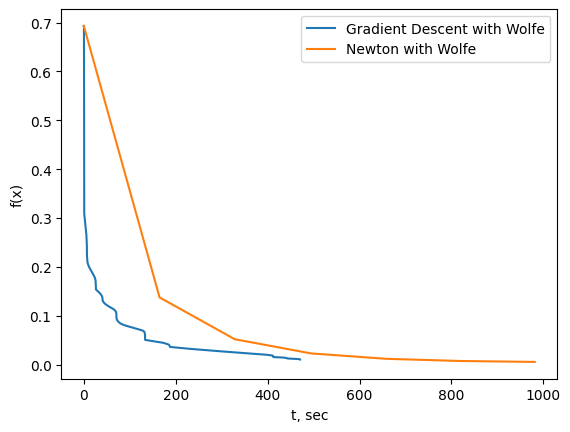

1906
7


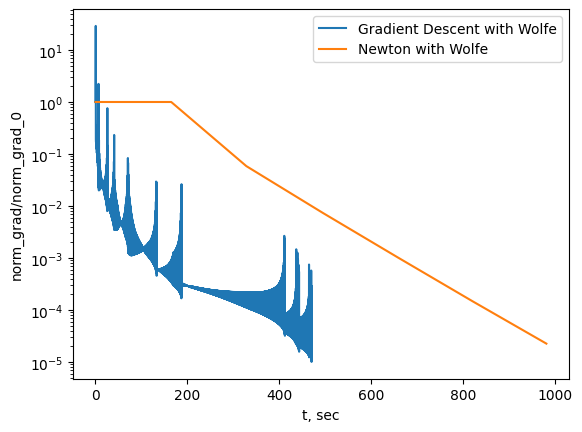

In [7]:
compare_speed('gisette_scale', method='Wolfe')

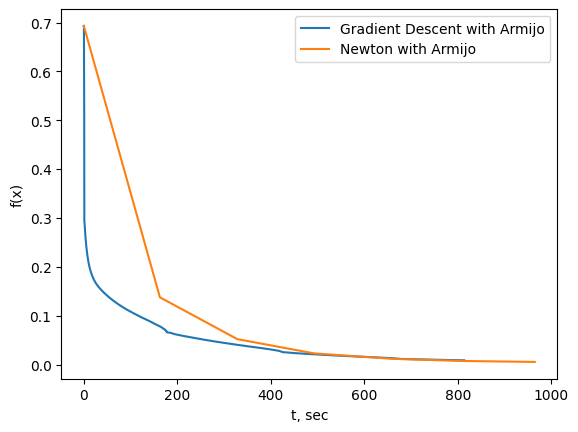

3392
7


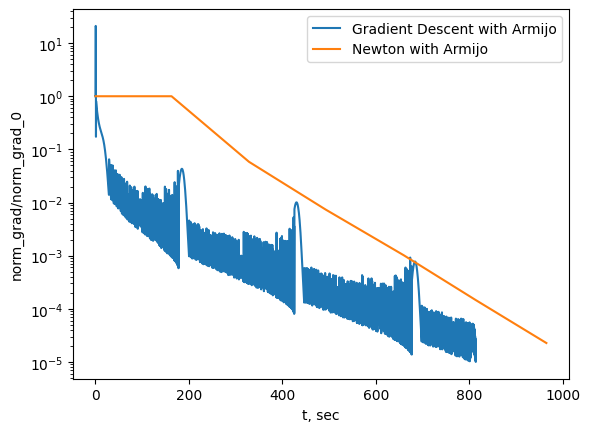

In [8]:
compare_speed('gisette_scale', method='Armijo')

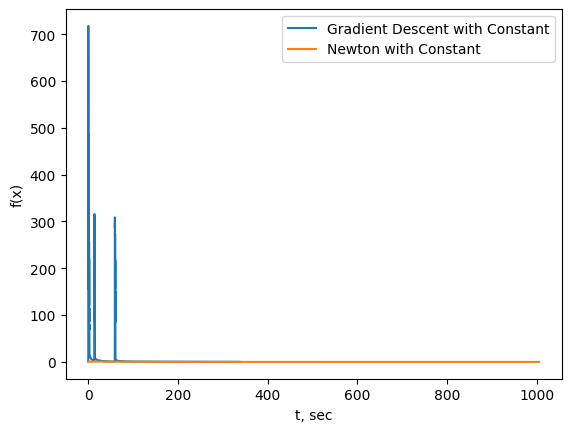

5902
7


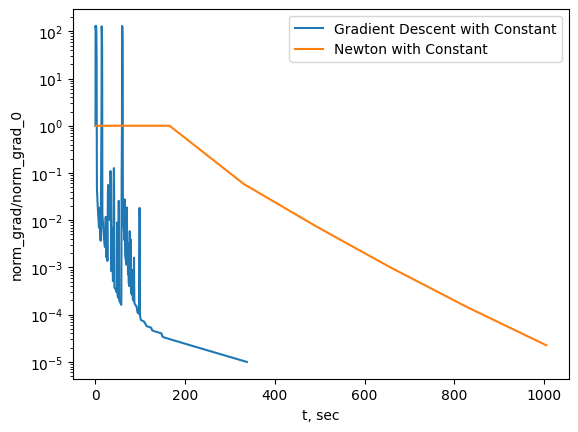

In [9]:
compare_speed('gisette_scale', method='Constant')

c:\Users\hkl19\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


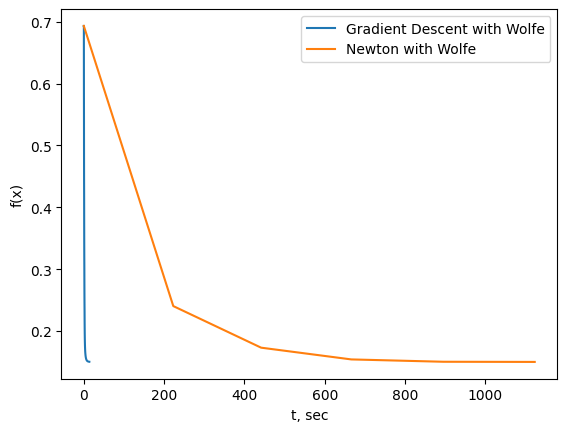

98
6


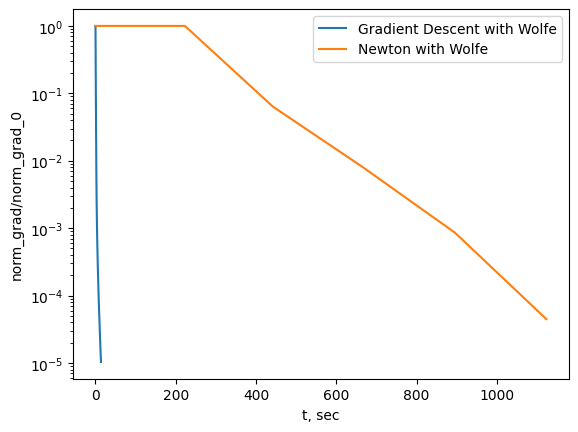

In [10]:
compare_speed('real-sim', method='Wolfe')

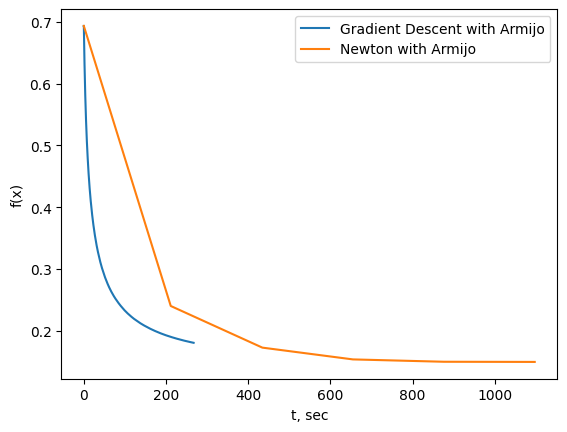

10001
6


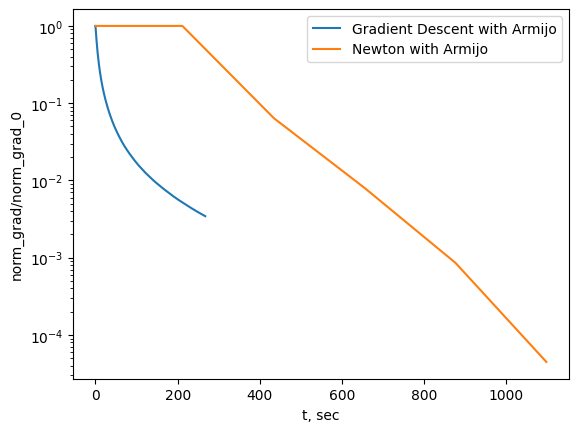

In [11]:
compare_speed('real-sim', method='Armijo')

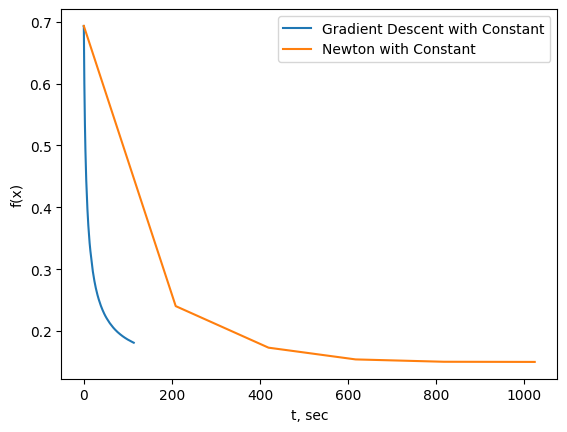

10001
6


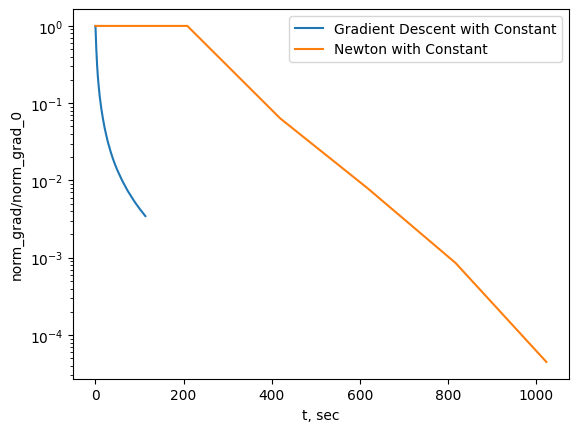

In [12]:
compare_speed('real-sim', method='Constant')